In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')
import time

In [2]:
%load_ext autoreload
%autoreload 2
from marcia import Sampler,Likelihood

In [3]:
Samp = Sampler('LCDM',['H0','Omega_m'],['CC','BAO-alam'],[70,0.3])

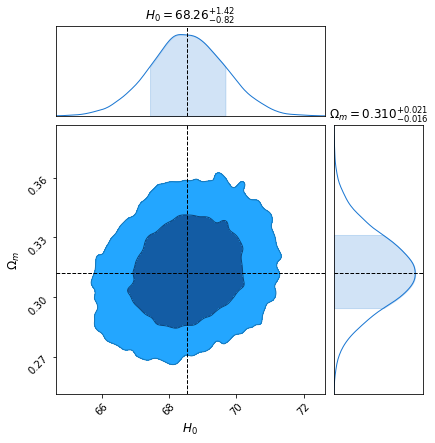

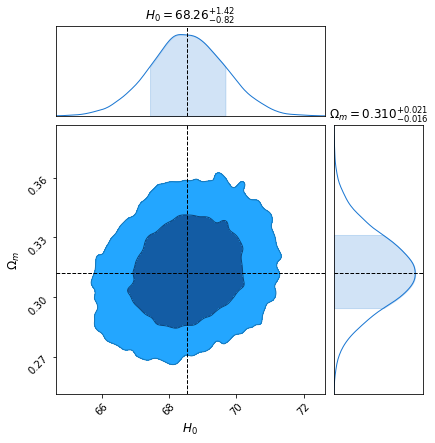

In [6]:
Samp.corner_plot('anto.h5')